Data Sample:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

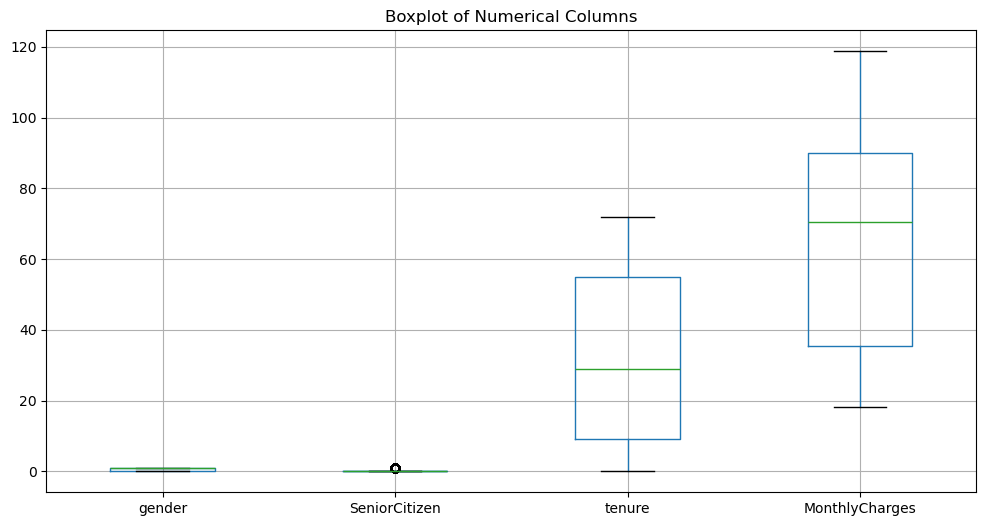

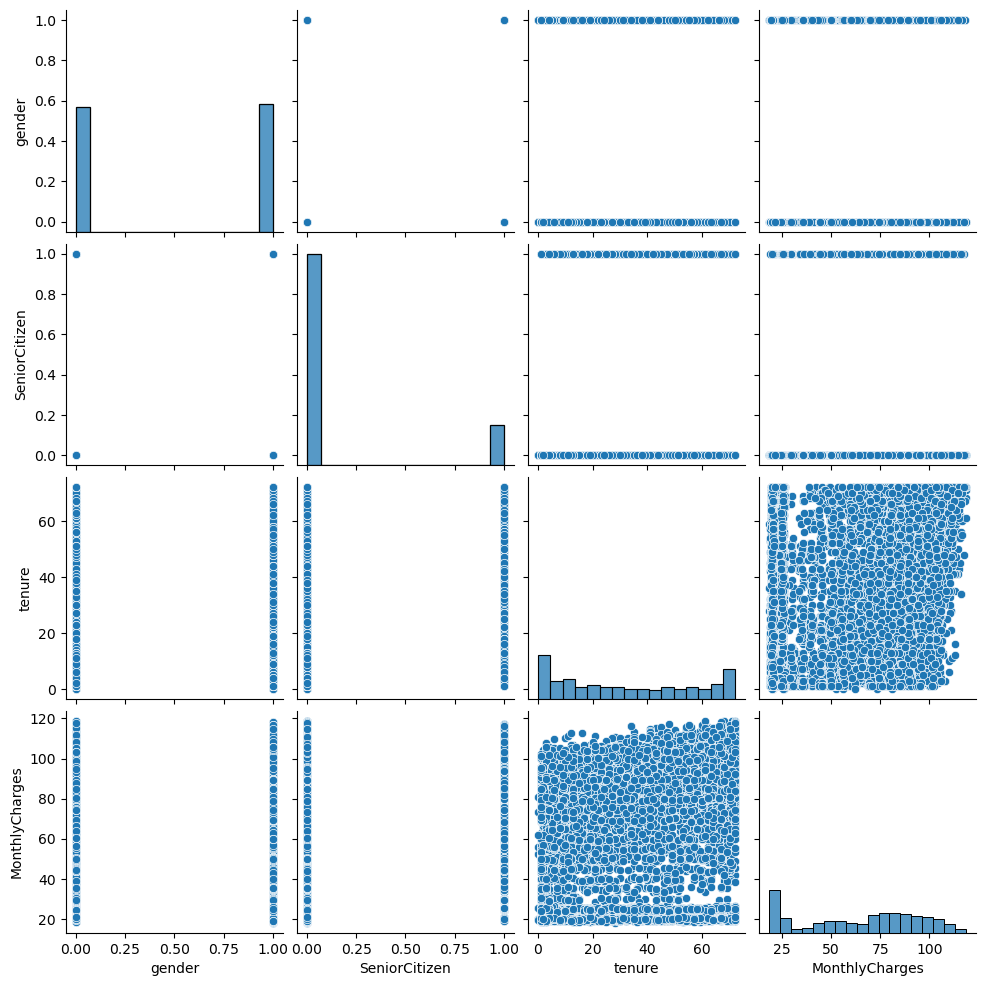

Data Types:
 customerID           object
gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
'churn' column not found in DataFrame.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
df = pd.read_csv("Telcom_Customer_Churn.csv")

# Display the first few rows and column names to confirm structure
print("Data Sample:\n", df.head())
print("DataFrame Columns:\n", df.columns)

# Check if 'age' and 'estimated_salary' columns exist
# Replace 'age' and 'estimated_salary' with the actual column names if different
age_column = 'age' if 'age' in df.columns else 'your_age_column_name'  # replace 'your_age_column_name' if needed
salary_column = 'estimated_salary' if 'estimated_salary' in df.columns else 'your_salary_column_name'  # replace 'your_salary_column_name' if needed

# Data Overview
print("Data Description:\n", df.describe())
print("Data Shape:", df.shape)
print("Missing Values by Column:\n", df.isna().sum())
print("Number of Duplicates:", df.duplicated().sum())

# Drop unnecessary columns (replace with actual column names if necessary)
columns_to_drop = ['column1', 'column2']  # Replace with columns to drop, or leave as an empty list if none
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("Updated DataFrame after dropping columns:\n", df.head())

# Encode categorical variables
le = LabelEncoder()
if 'gender' in df.columns:
    df['gender'] = le.fit_transform(df['gender'])
    print("Data Sample After Encoding 'gender':\n", df.head())
else:
    print("'gender' column not found in DataFrame.")

# Analysis: Compute average salary by age if columns exist
if age_column in df.columns and salary_column in df.columns:
    average_salary = df.groupby(age_column)[salary_column].mean()
    print("Average Salary by Age:\n", average_salary.head())
else:
    print(f"Columns '{age_column}' or '{salary_column}' not found in DataFrame.")

# Visualization
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['number']).boxplot()
plt.title('Boxplot of Numerical Columns')
plt.show()

if age_column in df.columns and salary_column in df.columns:
    plt.figure(figsize=(12, 6))
    plt.bar(df[age_column], df[salary_column], color='green')
    plt.title('Age vs Estimated Salary')
    plt.xlabel(age_column.capitalize())
    plt.ylabel(salary_column.replace('_', ' ').capitalize())
    plt.show()

sns.pairplot(df)
plt.show()

# Check Data Types
print("Data Types:\n", df.dtypes)

# Split data into features and target
if 'churn' in df.columns:
    X = df.drop(columns=['churn'])
    y = df['churn']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Save cleaned data to a new CSV
    df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)
    print("Cleaned data saved to 'Cleaned_Telecom_Customer_Churn.csv'")
else:
    print("'churn' column not found in DataFrame.")
